In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Sighting cleanup

In [33]:
df=pd.read_csv('data/total_311_rodent_sightings.csv',header=0,dtype={'Incident Zip': str})#,
                        #parse_dates=['Created Date','Closed Date','Resolution Action Updated Date'])
                        #infer_datetime_format = True)

/Users/ChrisD/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df[df['Created Date']>df['Closed Date']]["Unique Key"].count()

23259

In [34]:
df.head(2)

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,0,35970055,04/17/2017 12:00:00 AM,04/28/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11216.0,...,The Department of Health and Mental Hygiene wi...,04/28/2017 12:00:00 AM,03 BROOKLYN,BROOKLYN,997571.0,190326.0,BROOKLYN,40.689068,-73.951966,"(40.689067651771516, -73.95196632703079)"
1,1,35970759,04/18/2017 12:00:00 AM,04/27/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,11413.0,...,The Department of Health and Mental Hygiene wi...,04/27/2017 12:00:00 AM,13 QUEENS,QUEENS,1056281.0,185697.0,QUEENS,40.676079,-73.740316,"(40.67607906959029, -73.74031645113249)"


In [270]:
from dateutil import parser
parser.parse("08/24/2017 12:00:00 AM")

datetime.datetime(2017, 8, 24, 0, 0)

In [35]:
#min(parser.parse(["08/20/2017 12:00:00 AM","08/24/2017 12:00:00 AM"]))

In [36]:
from datetime import datetime
import re

In [19]:
oldstring = '04'
newstring = re.sub(r"\b0{1}","",oldstring)
int(newstring)*2

8

In [56]:
df['Created_dt']=df['Created Date'].apply(lambda x:datetime.strptime(str(x),"%m/%d/%Y %I:%M:%S %p").strftime('(%Y,%m,%d,%H,%M)'))

In [61]:
df['Created_Year']=df['Created_dt'].apply(lambda x: eval(re.sub(r"\b0{1}","",x))[0])

#eval(re.sub(r"\b0{1}","",dummy))[0]

In [63]:
df['Created_Month']=df['Created_dt'].apply(lambda x: eval(re.sub(r"\b0{1}","",x))[1])

(array([1.34202e+05, 9.30000e+01, 1.35000e+02, 1.16300e+03, 1.48800e+03,
        1.26500e+03, 1.70500e+03, 8.10000e+02, 7.17000e+02, 8.67000e+02]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

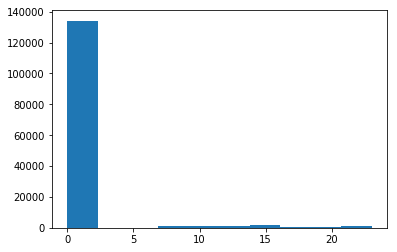

In [65]:
plt.hist(df['Created_dt'].apply(lambda x: eval(re.sub(r"\b0{1}","",x))[3]))

In [66]:
#Note above, most created at midnight, so probably batched processed complaints

In [78]:
df[df['Resolution Action Updated Date']==' '].head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Created_dt,Created_Year,Created_Month


In [81]:

#df['Resolution_dt']=df['Resolution Action Updated Date'].apply(lambda x:datetime.strptime(str(x),"%m/%d/%Y %I:%M:%S %p").strftime('(%Y,%m,%d,%H,%M)'))

df[['Created Date','Closed Date','Resolution Action Updated Date']].head(20)

,Created Date,Closed Date,Resolution Action Updated Date
0,04/17/2017 12:00:00 AM,04/28/2017 12:00:00 AM,04/28/2017 12:00:00 AM
1,04/18/2017 12:00:00 AM,04/27/2017 12:00:00 AM,04/27/2017 12:00:00 AM
2,06/04/2017 12:00:00 AM,06/16/2017 12:00:00 AM,06/16/2017 12:00:00 AM
3,03/31/2017 12:00:00 AM,03/31/2017 12:00:00 AM,03/31/2017 02:04:42 AM
4,06/04/2017 12:00:00 AM,06/19/2017 12:00:00 AM,06/19/2017 12:00:00 AM
5,04/19/2017 12:00:00 AM,04/28/2017 12:00:00 AM,04/28/2017 12:00:00 AM
6,10/07/2017 12:00:00 AM,10/17/2017 01:30:29 PM,10/17/2017 01:30:29 PM
7,10/07/2017 12:00:00 AM,10/19/2017 12:00:00 AM,10/19/2017 12:00:00 AM
8,04/19/2017 12:00:00 AM,04/28/2017 12:00:00 AM,04/28/2017 12:00:00 AM
9,04/19/2017 12:00:00 AM,04/28/2017 12:00:00 AM,04/28/2017 12:00:00 AM


### Sighting Data is good for dates, but not times, Most times logged at midnight

In [287]:
df[df['Closed Date']!=df['Resolution Action Updated Date']]['Resolution Description'].iloc[6]

'The Department of Health and Mental Hygiene will review your complaint to determine appropriate action.  Complaints of this type usually result in an inspection.  Please call 311 in 30 days from the date of your complaint for status'

In [288]:
df.groupby(['Resolution Description']).count()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
Resolution Description,,,,,,,,,,,,,,,,,,,,,
After reviewing this Service Request it was determined to be outside of New York City and no action could be taken at this time.,1,1,1,0,1,1,1,1,1,0,...,1,1,1,1,0,0,1,0,0,0
For updated status of your complaint go online at nyc.gov/311 and use the Check Status field or call 311.,2845,2845,2845,2077,2845,2845,2845,2845,2845,2834,...,2845,2845,2845,2845,2825,2825,2845,2825,2825,2825
Please contact the Department of Health and Mental Hygiene's Pest Control Services for updated status of your Service Request by calling (718) 629-5800.,641,641,641,641,641,641,641,641,641,636,...,641,641,641,641,636,636,641,636,636,636
Please contact the Department of Health and Mental Hygiene's Pest Control Services for updated status of your complaint by calling (212) 360-5928.,3141,3141,3141,3124,3141,3141,3141,3141,3141,3134,...,3141,3141,3141,3141,3133,3133,3141,3133,3133,3133
Please contact the Department of Health and Mental Hygiene's Pest Control Services for updated status of your complaint by calling (718) 520-4974.,2011,2011,2011,2006,2011,2011,2011,2011,2011,2005,...,2011,2011,2011,2011,2001,2001,2011,2001,2001,2001
Please contact the Department of Health and Mental Hygiene's Pest Control Services for updated status of your complaint by calling (718) 583-6133.,2871,2871,2871,2854,2871,2871,2871,2871,2871,2864,...,2871,2871,2871,2871,2861,2861,2871,2861,2861,2861
"Please contact the Department of Health and Mental Hygiene's Pest Control Services for updated status of your complaint. Brooklyn North Office (718) 625-5846 covers zip codes: 11201, 11205, 11206, 11211, 11213, 11215, 11216, 11217, 11221, 11222, 11225, 11231, 11232, 11233, 11237, 11238, 11239. Brooklyn South Office (718) 629-5800 covers zip codes: 11204, 11207, 11208, 11209, 11210, 11212, 11214, 11218, 11219, 11220, 11203, 11223, 11224, 11225, 11226, 11228, 11229, 11230, 11234, 11235, 11236.",4506,4506,4506,4497,4506,4506,4506,4506,4506,4490,...,4506,4506,4506,4506,4484,4484,4506,4484,4484,4484
The City has removed the graffiti from this property.,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
"The City inspected the property for cleaning, but no graffiti was found.",5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [89]:
df.groupby('Status').count()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,...,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Created_dt,Created_Year,Created_Month
Status,,,,,,,,,,,,,,,,,,,,,
Assigned,5902,5902,5902,389,5902,5902,5902,5902,5902,5886,...,5902,5855,5855,5902,5855,5855,5855,5902,5902,5902
Closed,104816,104816,104816,104584,104816,104816,104816,104816,104816,104484,...,104816,104127,104127,104816,104127,104127,104127,104816,104816,104816
Closed - Testing,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Draft,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Open,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Pending,31724,31724,31724,23279,31724,31724,31724,31724,31714,31684,...,31724,31635,31635,31724,31635,31635,31635,31724,31724,31724


In [91]:
df2=df.drop(columns=['Agency Name','Resolution Description','Status'])

In [93]:
df2.groupby(['Borough','Created_Year','Created_Month']).count()

Unnamed: 0  Unique Key  \
Borough       Created_Year Created_Month                           
BRONX         2010         1                     175         175   
                           2                     154         154   
                           3                     230         230   
                           4                     220         220   
                           5                     247         247   
                           6                     283         283   
                           7                     299         299   
                           8                     310         310   
                           9                     266         266   
                           10                    285         285   
                           11                    213         213   
                           12                    224         224   
              2011         1                     182         182   
                           2                     214         214   
                           3                     249         249   
                           4                     266         266   
                           5                     281         281   
                           6                     270         270   
                           7                     288         288   
                           8                     305         305   
                           9                     309         309   
                           10                    291         291   
                           11                    214         214   
                           12                    237         237   
              2012         1                     212         212   
                           2                     205         205   
                           3                     223         223   
                           4                     234         234   
                           5                     324         324   
                           6                     269         269   
...                                              ...         ...   
STATEN ISLAND 2016         2                      31          31   
                           3                      57          57   
                           4                      69          69   
                           5                      90          90   
                           6                     117         117   
                           7                     131         131   
                           8                     124         124   
                           9                      82          82   
                           10                     71          71   
                           11                     40          40   
                           12                     37          37   
              2017         1                      46          46   
                           2                      49          49   
                           3                      46          46   
                           4                      61          61   
                           5                      89          89   
                           6                     145         145   
                           7                     136         136   
                           8                     125         125   
                           9                      82          82   
                           10                     73          73   
                           11                     49          49   
                           12                     40          40   
              2018         1                      36          36   
                           2                      46          46   
                           3                       4           4   
Unspecified   2012         5  

In [9]:
import re
words = ['Rodents/Insects/Garbage','Rat Sighting']
rodent = re.compile(r'rodent')
rat=re.compile(r'rat')

for word in words:
    if regexp.search(word.lower()) or rat.search(word.lower()):
        print('matched',word)
    else:
        print('no')

matched Rodents/Insects/Garbage
matched Rat Sighting


In [32]:
!rm data/test_trimmed_311_2014.csv

rm: data/test_trimmed_311_2014.csv: No such file or directory


In [35]:
import re

# kill whatever trimmmed file might exist
!rm data/test_trimmed_311_2014.csv

!head -n 1 data/311_2014_first2000.csv >> data/test_trimmed_311_2014.csv

output= open('data/test_trimmed_311_2014.csv','a')

rodent = re.compile(r'rodent')
rat=re.compile(r'rat')
sighting=re.compile(r'sighting')

with open('/Users/ChrisD/Documents/UCBerkeleyMIDS/W209/Final_Proj_data/311_2014_first2000.csv') as f: #20MB buffering
    for line in f:
        parsed=line.split(',')  #csv split
        
        append=False
        
        
        if rodent.search(parsed[5].lower()) and sighting.search(parsed[6].lower()):
            #print('found')    
            append=True# make append true
        
        if append:
            output.write(line)
            
output.close()

### trim the yearly data into smaller file

- complaint type: contains "rodent*"
- descriptor: contains "sighting*"

In [38]:
# kill whatever trimmmed file might exist
!rm data/trimmed_311_2014.csv

In [39]:
import re

#fill in top row with column names
!head -n 1 data/311_Service_Requests_from_2014.csv >> data/trimmed_311_2014.csv

output= open('data/trimmed_311_2014.csv','a')

rodent = re.compile(r'rodent')
rat=re.compile(r'rat')
sighting=re.compile(r'sighting')

with open('/Users/ChrisD/Documents/UCBerkeleyMIDS/W209/rodents-nyc/data/311_Service_Requests_from_2014.csv',buffering=20000000) as f: #20MB buffering
    for line in f:
        parsed=line.split(',')  #csv split
        
        append=False
        
        if rodent.search(parsed[5].lower()) and sighting.search(parsed[6].lower()):
            #print('found')    
            append=True# make append true
        
        if append:
            output.write(line)
            
output.close()

In [70]:
df=pd.read_csv('data/trimmed_311_2014.csv',header=0)

/Users/ChrisD/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [71]:
df.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,28563358,07/27/2014 12:00:00 AM,08/01/2014 12:42:45 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10474,860 HUNTS POINT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.817978,-73.888775,"(40.81797767318111, -73.88877490885766)"
1,28840249,09/08/2014 12:00:00 AM,09/12/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10305,260 EDGEWATER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.616490,-74.064363,"(40.61649037051036, -74.06436307441926)"
2,29177646,10/29/2014 12:00:00 AM,11/12/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10460,771 EAST 185 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852445,-73.882851,"(40.852445407838395, -73.88285057984487)"
3,29179373,10/30/2014 12:00:00 AM,11/08/2014 11:54:04 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Construction Site,10007,287 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714694,-74.006244,"(40.71469440477969, -74.00624414472655)"
4,28541630,07/25/2014 12:00:00 AM,07/07/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206,177 JEFFERSON STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.701265,-73.929265,"(40.70126466941751, -73.92926530719352)"
5,28567968,07/28/2014 12:00:00 AM,08/18/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11213,838 MONTGOMERY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.664613,-73.936661,"(40.664612534996344, -73.93666104020632)"
6,27754807,03/31/2014 12:00:00 AM,04/18/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11203,3309 BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.645332,-73.945875,"(40.64533240216831, -73.94587546936323)"
7,29024630,10/07/2014 12:00:00 AM,10/24/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,Commercial Building,10001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.750991,-73.990623,"(40.75099082290243, -73.99062326583427)"
8,28746277,08/24/2014 12:00:00 AM,08/27/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11385,1915 WOODBINE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.704683,-73.904603,"(40.70468331879412, -73.90460262390022)"
9,27585079,03/06/2014 02:18:55 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10455,733 PROSPECT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.816879,-73.902791,"(40.81687872946484, -73.90279075170285)"


#### show columns

In [72]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

#### drop a bunch of columns that aren't needed.

- see work below for justification

In [129]:
drop_list=['Landmark','Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location','Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp','Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction','Ferry Terminal Name','School Name', 'School Number', 'School Region', 'School Code','School Phone Number', 'School Address', 'School City', 'School State','School Zip', 'School Not Found', 'School or Citywide Complaint', 'Park Facility Name']

In [74]:
# drop many columns
df.drop(drop_list, axis=1, inplace=True)

In [75]:
df.head(10)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
0,28563358,07/27/2014 12:00:00 AM,08/01/2014 12:42:45 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10474,860 HUNTS POINT AVENUE,...,The Department of Health and Mental Hygiene wi...,08/01/2014 12:42:45 PM,02 BRONX,BRONX,1015036,237308,BRONX,40.817978,-73.888775,"(40.81797767318111, -73.88877490885766)"
1,28840249,09/08/2014 12:00:00 AM,09/12/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10305,260 EDGEWATER STREET,...,The Department of Health and Mental Hygiene wi...,09/12/2014 12:00:00 AM,01 STATEN ISLAND,STATEN ISLAND,966381,163887,STATEN ISLAND,40.616490,-74.064363,"(40.61649037051036, -74.06436307441926)"
2,29177646,10/29/2014 12:00:00 AM,11/12/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10460,771 EAST 185 STREET,...,The Department of Health and Mental Hygiene wi...,11/12/2014 12:00:00 AM,06 BRONX,BRONX,1016659,249868,BRONX,40.852445,-73.882851,"(40.852445407838395, -73.88285057984487)"
3,29179373,10/30/2014 12:00:00 AM,11/08/2014 11:54:04 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Construction Site,10007,287 BROADWAY,...,The Department of Health and Mental Hygiene wi...,11/08/2014 11:54:04 AM,Unspecified MANHATTAN,MANHATTAN,982519,199659,MANHATTAN,40.714694,-74.006244,"(40.71469440477969, -74.00624414472655)"
4,28541630,07/25/2014 12:00:00 AM,07/07/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206,177 JEFFERSON STREET,...,The Department of Health and Mental Hygiene wi...,07/07/2014 12:00:00 AM,04 BROOKLYN,BROOKLYN,1003863,194774,BROOKLYN,40.701265,-73.929265,"(40.70126466941751, -73.92926530719352)"
5,28567968,07/28/2014 12:00:00 AM,08/18/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11213,838 MONTGOMERY STREET,...,The Department of Health and Mental Hygiene wi...,08/18/2014 12:00:00 AM,09 BROOKLYN,BROOKLYN,1001822,181419,BROOKLYN,40.664613,-73.936661,"(40.664612534996344, -73.93666104020632)"
6,27754807,03/31/2014 12:00:00 AM,04/18/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11203,3309 BEVERLY ROAD,...,For updated status of your complaint go online...,04/18/2014 12:00:00 AM,17 BROOKLYN,BROOKLYN,999270,174393,BROOKLYN,40.645332,-73.945875,"(40.64533240216831, -73.94587546936323)"
7,29024630,10/07/2014 12:00:00 AM,10/24/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,Commercial Building,10001,NaN,...,For updated status of your complaint go online...,10/24/2014 12:00:00 AM,05 MANHATTAN,MANHATTAN,986848,212883,MANHATTAN,40.750991,-73.990623,"(40.75099082290243, -73.99062326583427)"
8,28746277,08/24/2014 12:00:00 AM,08/27/2014 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11385,1915 WOODBINE STREET,...,The Department of Health and Mental Hygiene wi...,08/27/2014 12:00:00 AM,05 QUEENS,QUEENS,1010700,196026,QUEENS,40.704683,-73.904603,"(40.70468331879412, -73.90460262390022)"
9,27585079,03/06/2014 02:18:55 PM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10455,733 PROSPECT AVENUE,...,For updated status of your complaint go online...,03/28/2014 04:17:30 AM,01 BRONX,BRONX,1011157,236903,BRONX,40.816879,-73.902791,"(40.81687872946484, -73.90279075170285)"


In [76]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Borough', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [78]:
df.groupby(['Borough','Descriptor'])['Agency'].count()

Borough        Descriptor    
BRONX          Mouse Sighting     969
               Rat Sighting      2743
BROOKLYN       Mouse Sighting    1236
               Rat Sighting      3968
MANHATTAN      Mouse Sighting    1009
               Rat Sighting      3541
QUEENS         Mouse Sighting     658
               Rat Sighting      1748
STATEN ISLAND  Mouse Sighting     121
               Rat Sighting       617
Name: Agency, dtype: int64

In [79]:
rat_sightings=df[df['Descriptor']=='Rat Sighting']

In [80]:
rat_sightings.groupby(['Borough']).count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
Borough,,,,,,,,,,,,,,,,,,,,,
BRONX,2743,2743,2639,2743,2743,2743,2743,2743,2737,2623,...,2743,2743,2743,2743,2735,2735,2743,2735,2735,2735
BROOKLYN,3968,3968,3801,3968,3968,3968,3968,3968,3959,3690,...,3968,3968,3968,3968,3947,3947,3968,3947,3947,3947
MANHATTAN,3541,3541,3453,3541,3541,3541,3541,3541,3534,3171,...,3541,3541,3541,3541,3509,3509,3541,3509,3509,3509
QUEENS,1748,1748,1710,1748,1748,1748,1748,1748,1746,1555,...,1748,1748,1748,1748,1739,1739,1748,1739,1739,1739
STATEN ISLAND,617,617,588,617,617,617,617,617,616,540,...,617,617,617,617,616,616,617,616,616,616


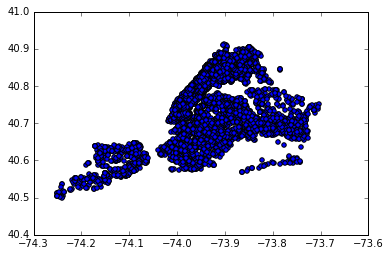

In [81]:
plt.scatter(rat_sightings['Longitude'],rat_sightings['Latitude'])

In [90]:
#rat_sightings.groupby(['Incident Zip']).count().sort(['Incident Zip'])

del grouped

In [98]:
rat_sightings.groupby(['Borough']).count().sort_values('Unique Key',ascending=False)['Unique Key']

Borough
BROOKLYN         3968
MANHATTAN        3541
BRONX            2743
QUEENS           1748
STATEN ISLAND     617
Name: Unique Key, dtype: int64

In [99]:
rat_sightings.groupby(['Incident Zip','Borough']).count().sort_values('Unique Key',ascending=False)['Unique Key'].head(20)

Incident Zip  Borough  
11221         BROOKLYN     359
11216         BROOKLYN     348
10025         MANHATTAN    319
11233         BROOKLYN     258
10009         MANHATTAN    245
10027         MANHATTAN    234
10456         BRONX        227
10457         BRONX        227
10458         BRONX        218
11385         QUEENS       215
11238         BROOKLYN     207
11237         BROOKLYN     201
10467         BRONX        198
11206         BROOKLYN     198
11207         BROOKLYN     190
11213         BROOKLYN     181
11222         BROOKLYN     179
10002         MANHATTAN    176
10031         MANHATTAN    175
10033         MANHATTAN    171
Name: Unique Key, dtype: int64

In [113]:
[rat_sightings.ix[3][i] for i in [1,2,3,4,8,9]]

['10/30/2014 12:00:00 AM',
 '11/08/2014 11:54:04 AM',
 'DOHMH',
 'Department of Health and Mental Hygiene',
 10007.0,
 '287 BROADWAY']

In [107]:
dummy=list(range(10))

In [111]:
[dummy[i] for i in [1,2,3,4,8,9]]

[1, 2, 3, 4, 8, 9]

In [115]:
columns_raw=pd.read_csv('data/trimmed_311_2014.csv',header=0).columns

/Users/ChrisD/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
keep_list_idx=list()

for i in range(len(columns_raw)):
    if columns_raw[i] in drop_list:
        pass
    else:
        print(columns_raw[i],i)
        keep_list_idx.append(i)

Unique Key 0
Created Date 1
Closed Date 2
Agency 3
Agency Name 4
Complaint Type 5
Descriptor 6
Location Type 7
Incident Zip 8
Incident Address 9
Street Name 10
Cross Street 1 11
Cross Street 2 12
Intersection Street 1 13
Intersection Street 2 14
Address Type 15
City 16
Facility Type 18
Status 19
Due Date 20
Resolution Description 21
Resolution Action Updated Date 22
Community Board 23
Borough 24
X Coordinate (State Plane) 25
Y Coordinate (State Plane) 26
Park Borough 28
Latitude 50
Longitude 51
Location 52


In [136]:
print(keep_list_idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 50, 51, 52]


In [165]:
pd.read_csv('data/trimmed_311_2014.csv',header=0).columns[keep_list_idx]

/Users/ChrisD/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Borough', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [168]:
!echo "'Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name','Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip','Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2','Intersection Street 1', 'Intersection Street 2','City', 'Facility Type', 'Status', 'Due Date', 'Resolution Description','Resolution Action Updated Date', 'Community Board', 'Borough','X Coordinate (State Plane)', 'Y Coordinate (State Plane)','Park Borough', 'Latitude', 'Longitude', 'Location' \n" >> data/trimmed_311_2014_b.csv

# NEW TRIMMING

#### buggy, dont use
- i think its teh (#,#) format for location that I have to deal with or drop/recreate after the fact

In [204]:
# kill whatever trimmmed file might exist
!rm data/trimmed_311_2014_b.csv

In [205]:
!echo "Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location\n" >> data/trimmed_311_2014_b.csv
! cat data/trimmed_311_2014_b.csv

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,City,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location



In [206]:
import re

#fill in top row with column names
#!head -n 1 data/311_Service_Requests_from_2014.csv >> data/trimmed_311_2014_b.csv

output= open('data/trimmed_311_2014_b.csv','a')

rodent = re.compile(r'rodent')
rat=re.compile(r'rat')
sighting=re.compile(r'sighting')
keep_list=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 50, 51, 52]


with open('/Users/ChrisD/Documents/UCBerkeleyMIDS/W209/rodents-nyc/data/311_Service_Requests_from_2014.csv',buffering=20000000) as f: #20MB buffering
    for line in f:
        parsed=line.split(',')  #csv split
        
        append=False
        
        if rodent.search(parsed[5].lower()) and sighting.search(parsed[6].lower()):
            #print('found')    
            append=True# make append true
        
        if append:
            outrow=list()
            outline=str()
            for i in keep_list:
                outrow.append(parsed[i])
            outline=",".join(outrow)
            output.write("{}\n".format(outline))
            
output.close()

In [207]:
df2=pd.read_csv('data/trimmed_311_2014_b.csv',header=0)

In [208]:
df2.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'City',
       'Facility Type', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Borough', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [209]:
df2['Location'].head()

28563358    (40.81797767318111\n28840249,09/08/2014 12:00:...
29177646    (40.852445407838395\n29179373,10/30/2014 12:00...
28541630    (40.70126466941751\n28567968,07/28/2014 12:00:...
27754807    (40.64533240216831\n29024630,10/07/2014 12:00:...
28746277    (40.70468331879412\n27585079,03/06/2014 02:18:...
Name: Location, dtype: object

# Drop Justification

## Drop landmarks

- landmarks practically non-existent present
-  Landmark column 17 #python index 0:

In [127]:
df.groupby('Landmark').count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
Landmark,,,,,,,,,,,,,,,,,,,,,
BROOKLYN MUSEUM,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
J F K AIRPORT,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
PENNSYLVANIA STATION,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


#### Park Facility Name

-  all "Unspecified"

In [65]:
df.groupby(['Park Facility Name']).count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location
Park Facility Name,,,,,,,,,,,,,,,,,,,,,
Unspecified,16610,16610,16046,16610,16610,16610,16610,16610,16582,15526,...,16610,16610,16610,16610,16530,16530,16610,16530,16530,16530


## Schools

- no specific school names or addresses, provides no added information

In [49]:
df.groupby(['School Address']).count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Latitude,Longitude,Location
School Address,,,,,,,,,,,,,,,,,,,,,
Unspecified,16610,16610,16046,16610,16610,16610,16610,16610,16582,15526,...,16610,16610,16610,16610,16610,16588,0,16530,16530,16530


In [50]:
df.groupby(['School Zip']).count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Not Found,School or Citywide Complaint,Latitude,Longitude,Location
School Zip,,,,,,,,,,,,,,,,,,,,,
Unspecified,16610,16610,16046,16610,16610,16610,16610,16610,16582,15526,...,16610,16610,16610,16610,16610,16588,0,16530,16530,16530


In [51]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [52]:
df.groupby(['School Number']).count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Latitude,Longitude,Location
School Number,,,,,,,,,,,,,,,,,,,,,
Unspecified,16610,16610,16046,16610,16610,16610,16610,16610,16582,15526,...,16610,16610,16610,16610,16610,16588,0,16530,16530,16530


In [55]:
df.groupby(['School or Citywide Complaint']).count()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
School or Citywide Complaint,,,,,,,,,,,,,,,,,,,,,


## Others

#### Types with no useful data (blank, unspecified, not-pertient)

- 'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name'